## Acting on Wrangled Data

Continuing working on datas precedently cleaned in ```wrangle_act.pynb```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('twitter_master_dataset.csv')

### Simple statistics on the data we have

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 18 columns):
Unnamed: 0            1561 non-null int64
tweet_id              1561 non-null int64
timestamp             1561 non-null object
source                0 non-null float64
text                  1561 non-null object
expanded_urls         1561 non-null object
rating                1561 non-null int64
name                  1561 non-null object
stage                 1561 non-null object
nb_favorites          1561 non-null int64
nb_retweets           1561 non-null int64
nb_user_followers     1561 non-null int64
nb_user_favourites    1561 non-null int64
creation_date         1561 non-null object
jpg_url               1561 non-null object
img_num               1561 non-null int64
prediction            1561 non-null object
confidence            1561 non-null int64
dtypes: float64(1), int64(9), object(8)
memory usage: 219.6+ KB


In [5]:
df[['rating', 'nb_retweets', 'nb_favorites', 'confidence']].describe()

,rating,nb_retweets,nb_favorites,confidence
count,1561.000000,1561.000000,1561.000000,1561.000000
mean,10.861627,2555.532351,8814.748238,54.651505
std,1.746812,4616.444958,12763.369094,29.992739
min,2.000000,11.000000,72.000000,0.000000
25%,10.000000,593.000000,2071.000000,30.000000
50%,11.000000,1295.000000,4134.000000,54.000000
75%,12.000000,2902.000000,11083.000000,82.000000
max,14.000000,78029.000000,156603.000000,99.000000


### Distribution of the Race of Dogs

In [6]:
# Which dog is the most present
topRaces = df['prediction'].value_counts().head(10)
topRaces = topRaces.reset_index()
topRaces.rename(columns={'index':'dog_name', 'prediction':'count'}, inplace=True)
topRaces['dog_name'] = topRaces.replace(to_replace=r'_', value=' ', regex=True)['dog_name'].str.title()

Text(0.5, 1.0, 'Top 10 Dogs Race')

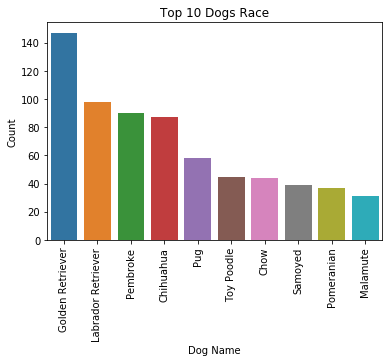

In [7]:
sns.barplot(x=topRaces['dog_name'], y=topRaces['count'])
plt.xticks(rotation=90)
plt.xlabel('Dog Name')
plt.ylabel('Count')
plt.title('Top 10 Dogs Race')

We can see than ```Golden Retriever``` is highly represented in all those tweets (most photoigenic dog ?). Then, you find another ```Retriever``` (but a ```Labrador```) and a ```Pembroke```

### What about all the votes ?

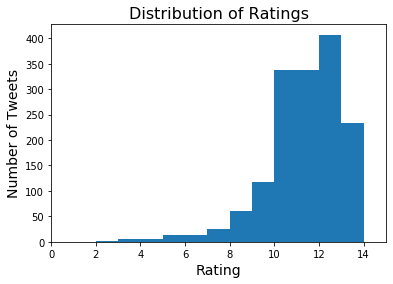

In [8]:
df['rating'].plot(kind = 'hist', bins = 12)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

We can see that this graph is skewed to the left. The most votes are between 8 and 14, and the most votes are between 10 and 13 inclusive. This is completely understandable just because `aren't those puppies not always cute ?``

In [9]:
df.sort_values(by = 'nb_retweets', ascending = False).head(5)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating,name,stage,nb_favorites,nb_retweets,nb_user_followers,nb_user_favourites,creation_date,jpg_url,img_num,prediction,confidence
660,660,744234799360020481,2016-06-18 18:26:18+00:00,NaN,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,156603,78029,8774908,146020,2016-06-18 18:26:18+00:00,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,82
684,684,739238157791694849,2016-06-04 23:31:25+00:00,NaN,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,None,doggo,115673,57845,8774908,146020,2016-06-04 23:31:25+00:00,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,50
349,349,807106840509214720,2016-12-09 06:17:20+00:00,NaN,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,Stephan,none,120974,56887,8774888,146020,2016-12-09 06:17:20+00:00,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,50
266,266,822872901745569793,2017-01-21 18:26:02+00:00,NaN,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,puppo,133372,43960,8774888,146020,2017-01-21 18:26:02+00:00,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,19
52,52,879415818425184262,2017-06-26 19:07:24+00:00,NaN,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,Duddles,none,99473,40697,8774884,146020,2017-06-26 19:07:24+00:00,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,38


In [10]:
df.sort_values(by = 'nb_favorites', ascending = False).head(5)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating,name,stage,nb_favorites,nb_retweets,nb_user_followers,nb_user_favourites,creation_date,jpg_url,img_num,prediction,confidence
660,660,744234799360020481,2016-06-18 18:26:18+00:00,NaN,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,156603,78029,8774908,146020,2016-06-18 18:26:18+00:00,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,82
266,266,822872901745569793,2017-01-21 18:26:02+00:00,NaN,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,puppo,133372,43960,8774888,146020,2017-01-21 18:26:02+00:00,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,19
349,349,807106840509214720,2016-12-09 06:17:20+00:00,NaN,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,Stephan,none,120974,56887,8774888,146020,2016-12-09 06:17:20+00:00,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,50
98,98,866450705531457537,2017-05-22 00:28:40+00:00,NaN,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,Jamesy,pupper,116677,33043,8774884,146020,2017-05-22 00:28:40+00:00,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,90
684,684,739238157791694849,2016-06-04 23:31:25+00:00,NaN,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,None,doggo,115673,57845,8774908,146020,2016-06-04 23:31:25+00:00,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,50


### Retweets vs Favorites, a possible correlation ?

Text(0.5, 1.0, 'Nb retweets vs nb favorites')

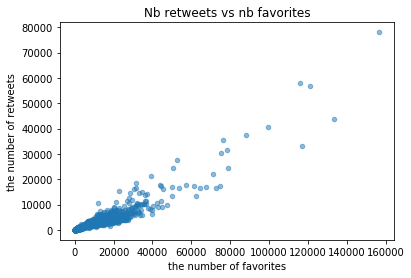

In [11]:
# Let's look if there is a correlation between retweet and favorites
df.plot(kind='scatter',x='nb_favorites',y='nb_retweets', alpha = 0.5)
plt.xlabel('the number of favorites')
plt.ylabel('the number of retweets')
plt.title('Nb retweets vs nb favorites')

There really seems to be a correlation between number of retweets and favorites. We can assume also that there is always more favorites than retweets. 

### Conclusion

The top 3 of the most dog types are **Golden Retriever**, **Labrador Retriever** and **Pembroke** (see the graph for the detail list)

I noticed that there is a real correlation between Retweets and Favorites. Those 2 behaviours depict the reaction of the humans reading and showing their interest into those tweets (positive vibes).

While looking to the histogram depicting ratings, I realised that generally rating is over 10 (and more particularly between 10 and 13). The mean value is 10.86. This may say that everybody find those dogs so cute and funny that they just have to overrate those pictures.